In [2]:
#importing modelling libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

In [3]:
#read the file
churn = pd.read_csv('/content/Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#basic info about the variables
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn.shape #shape of data

(10000, 14)

In [13]:
#removing first three columns and last column(target var) since they are of no use
X = churn.iloc[:,3:-1]

In [15]:
#storing target variable in y
y = churn['Exited']

In [16]:
#Data Preprocessing 
X = pd.get_dummies(X, columns = ['Geography', 'Gender'], drop_first=True)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


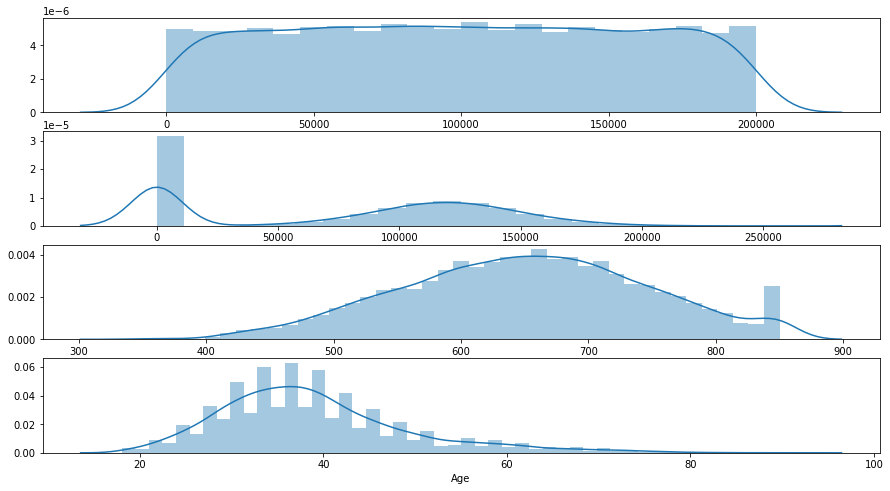

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(4,1,1)
sns.distplot(X['EstimatedSalary'])
plt.subplot(4,1,2)
sns.distplot(X['Balance'])
plt.subplot(4,1,3)
sns.distplot(X['CreditScore'])
plt.subplot(4,1,4)
sns.distplot(X['Age'])

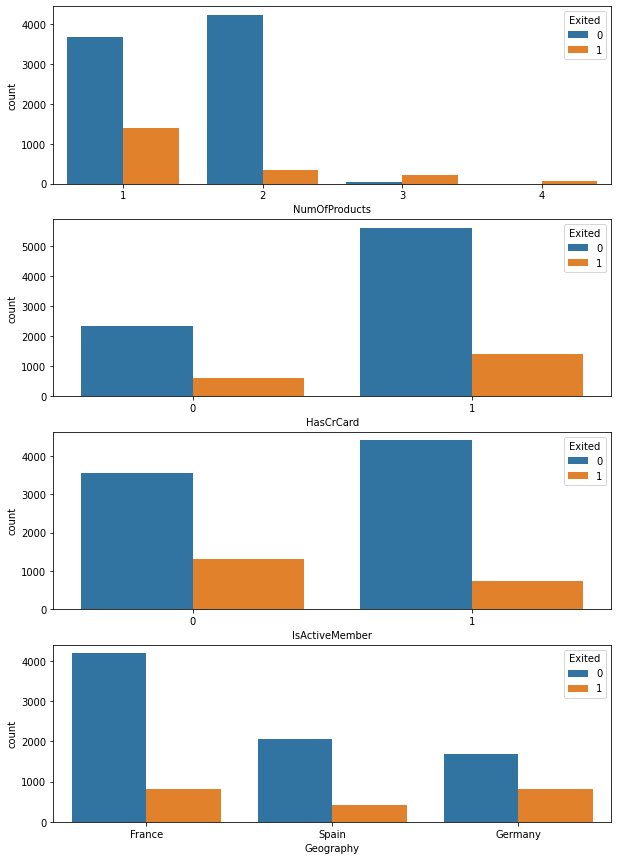

In [23]:
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
sns.countplot(churn['NumOfProducts'], hue =y)
plt.subplot(4,1,2)
sns.countplot(churn['HasCrCard'], hue = y)
plt.subplot(4,1,3)
sns.countplot(churn['IsActiveMember'], hue = y)
plt.subplot(4,1,4)
sns.countplot(churn['Geography'], hue =y)

In [27]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state =100)

In [25]:
r=1309
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),BaggingClassifier(random_state=r),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          XGBClassifier(random_state=r), MLPClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN","SVC","Bagging",
             "DecisionTree","Random_Forest","GBM","XGBoost","Art.Neural_Network"]

In [28]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_val))

Default model validation accuracies for the train data:

LogisticRegression : 0.791
GaussianNB : 0.784
KNN : 0.753
SVC : 0.794
Bagging : 0.848
DecisionTree : 0.793
Random_Forest : 0.856
GBM : 0.861
XGBoost : 0.857
Art.Neural_Network : 0.677


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
model_GBM = GradientBoostingClassifier(random_state=r)
model_GBM.fit(x_train, y_train)
y_predt = model_GBM.predict(x_val)

In [30]:
from sklearn.metrics import roc_curve, auc, classification_report

In [31]:
y_proba = model.predict_proba(x_val)

In [33]:
y_proba = y_proba[:, 1]

array([7.03146712e-09, 2.66238923e-11, 4.68834776e-48, ...,
       4.57171800e-06, 1.97925706e-16, 2.45569095e-19])

In [39]:
y_proba.shape

(2000, 2)

In [40]:
fpr, tpr, t = roc_curve(y_val, y_proba[:, 1] , pos_label =1)

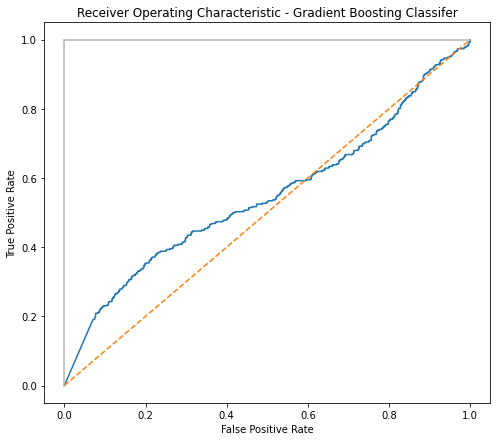

In [51]:
plt.subplots(1, figsize=(8,7))
plt.title('Receiver Operating Characteristic - Gradient Boosting Classifer')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
model_LG = LogisticRegression(random_state=r)
model_LG.fit(x_train, y_train)
y_proba2 = model_LG.predict_proba(x_val)

In [55]:
fpr2, tpr2, t2 = roc_curve(y_val, y_proba2[:, 1] , pos_label =1)

In [56]:
t2[0] =1

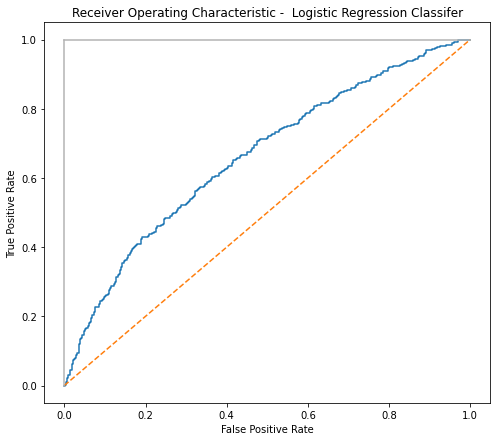

In [57]:
plt.subplots(1, figsize=(8,7))
plt.title('Receiver Operating Characteristic -  Logistic Regression Classifer')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()